<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">
<hr>
<br>

<h1 align='center'>Validating</h1>

<br>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
            <img src="static/roc_curve.svg" width="300">
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <br>
        <br>
        <div style="display: table-cell; width: 40%; vertical-align: top;">
            <blockquote>
                <p style="font-style: italic;">"It doesn't matter how beautiful your theory is. It doesn't matter how smart you are. If it doesn't agree with the experiment, it is wrong."</p>
                <br>
                <p>-Richard Feynman</p>
            </blockquote>
        </div>
    </div>
</div>

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:ROC_curves_colors.svg'>נדב ס</a> under the <a href='https://creativecommons.org/licenses/by-sa/4.0/deed.en'>CC BY-SA 4.0</a>
</div>

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Generally

Model **validation** is the process of taking our model and evaluating its effectiveness. There are a multitude of different ways to validate our classifers and regressors, but most involve creating a **score** that tells us how good or bad our model is. These scores and helper tools are found within the [sklearn.metrics module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), and a list of the different scoring types are found on this [table](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules).

---

## Scoring Types

The more common scores you will see are:

* **Classification**

    * **accuracy**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
        
    * **f1**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
        * [Wikipedia](https://en.wikipedia.org/wiki/F1_score)
        
    * **precision**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)
        * [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall#Precision)
        
    * **recall**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
        * [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall#Recall)
        

* **Regression**

    * **neg_mean_absolute_error**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
        * [Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)
        
    * **neg_mean_squared_error**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
        
    * **neg_mean_squared_log_error**
        * [Sklearn Documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error)
        * [Sklearn Class Docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)



---

## Which score should I use?

It depends.

## Depends on what?

Fancy stuff outside the scope of this presentation.

If you have no idea where to start, I've found f1 is generally pretty good for classifications and negative mean squared error is generally pretty good for regressors.

---

## How to Use

Generally you have the option of either using your scoring functions directly on your data, or using them as part of a **cross-validator**, which we will describe here.

Remember the **train_test_split()** from before that we used to prevent **overfitting**? In practice, that meant that we were only giving our model a portion of the data we have to train. Wouldn't it be useful if we could use all that data, but just rotate our training and testing sets?

That's what [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) is. See also the <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">Wikipedia page</a>.

<img src='static/cross_validation.jpg'>

Image courtesy of <a href="https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.jpg">Fabian Flöck</a> under the <a href="https://creativecommons.org/licenses/by-sa/3.0/deed.en">CC BY-SA 3.0</a>.

Note: we already did this using the GridSearchCV. The CV stands for "cross-validation".

#### Direct Use

Say we want to evaluate our Iris dataset again and we want to compare two models.

The first of these models will use 'sepal_length' and 'sepal_width' fed through a radial basis function SVM.

The second of these models will use 'petal_length' and 'petal_width' fed through a linear SVM.

In [2]:
# Load our data
df = pd.read_csv('data/iris.csv')

# Split our data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df.iloc[:,4])
X1_train = X_train[['sepal_length', 'sepal_width']]
X1_test  = X_test[['sepal_length', 'sepal_width']]
X2_train = X_train[['petal_length', 'petal_width']]
X2_test  = X_test[['petal_length', 'petal_width']]
y_train  = y_train
actual   = y_test

# Create our pipelines
pipe_1 = Pipeline([('scale', RobustScaler()), ('clf'  , SVC(kernel='rbf'))])
pipe_2 = Pipeline([('scale', RobustScaler()), ('clf'  , SVC(kernel='linear'))])

# Fit our pipelines
pipe_1.fit(X1_train, y_train)
pipe_2.fit(X2_train, y_train)

# Predict our outcomes
pipe_1_predictions = pipe_1.predict(X1_test)
pipe_2_predictions = pipe_2.predict(X2_test)

# Present our findings
results_df = pd.DataFrame({
    'pipe_1_prediction': pipe_1_predictions,
    'pipe_2_prediction': pipe_2_predictions, 
    'actual'           : actual
})
results_df.head()

,pipe_1_prediction,pipe_2_prediction,actual
80,versicolor,versicolor,versicolor
112,virginica,virginica,virginica
3,setosa,setosa,setosa
21,setosa,setosa,setosa
79,versicolor,versicolor,versicolor


In [3]:
# We can then use pass y_true and y_predicted to get an accuracy and f1 score for each model.
scores = {
    'pipe_1_accuracy': accuracy_score(actual, pipe_1_predictions),
    'pipe_2_accuracy': accuracy_score(actual, pipe_2_predictions),
    # Note, multiclass f1 scores need average set to None (default is binary)
    'pipe_1_f1'      : f1_score(actual, pipe_1_predictions, average='macro'),
    'pipe_2_f1'      : f1_score(actual, pipe_2_predictions, average='macro')
}

for key, value in scores.items():
    print(key)
    print(value.round(4))
    print()

pipe_1_accuracy
0.7368

pipe_2_accuracy
0.9474

pipe_1_f1
0.729

pipe_2_f1
0.9429



#### Cross-Validation

Cross-validation is even easier than doing it manually. To cross-validate, we use the cleverely named [cross_val_score() function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Instead of manually fitting and splitting and analyzing, we can just do it [all at once](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

It takes longer complexity, but better results because more data. You can fine tune the number of splits with the 'cv' parameter, which takes the number of splits.

In [4]:
# Load our data
df = pd.read_csv('data/iris.csv')
X1 = df[['sepal_length', 'sepal_width']]
X2 = df[['petal_length', 'petal_width']]
y  = df['species']

# Create our pipelines
pipe_1 = Pipeline([('scale', RobustScaler()), ('clf', SVC(kernel='rbf'))])
pipe_2 = Pipeline([('scale', RobustScaler()), ('clf', SVC(kernel='linear'))])

# Run our 5-fold cross validation and get the average score of the 5.
# Note: because this is multiclass, we need to use f1_micro, f1_macro, weighted (see documentation)
# Note: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
pipe_1_f1  = cross_val_score(pipe_1, X1, y, scoring='f1_macro', cv=5).mean()
pipe_1_acc = cross_val_score(pipe_1, X1, y, scoring='accuracy', cv=5).mean()
pipe_2_f1  = cross_val_score(pipe_2, X2, y, scoring='f1_macro', cv=5).mean()
pipe_2_acc = cross_val_score(pipe_2, X2, y, scoring='accuracy', cv=5).mean()

In [5]:
# Print the scores out
scores = {
    'pipe_1_f1' : pipe_1_f1,
    'pipe_2_f1' : pipe_2_f1,
    'pipe_1_acc': pipe_1_acc,
    'pipe_2_acc': pipe_2_acc,
}

for key, value in scores.items():
    print(key)
    print(value.round(4))
    print()

pipe_1_f1
0.7968

pipe_2_f1
0.9531

pipe_1_acc
0.8

pipe_2_acc
0.9533



## Additional Validation

Sklearn also has a bunch of helper functions to make your life easier. Most useful of these will be your classification report

In [6]:
# Taking our results df from above
results_df.head()

,pipe_1_prediction,pipe_2_prediction,actual
80,versicolor,versicolor,versicolor
112,virginica,virginica,virginica
3,setosa,setosa,setosa
21,setosa,setosa,setosa
79,versicolor,versicolor,versicolor


#### Classification report

This provides you with quick and dirty summary of your model results.

* [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [7]:
report_1 = classification_report(
    results_df.actual,
    results_df.pipe_1_prediction
)

report_2 = classification_report(
    results_df.actual,
    results_df.pipe_2_prediction
)

print('Pipe 1:\n', report_1, '\n\n\n', 'Pipe 2:\n', report_2)

Pipe 1:
              precision    recall  f1-score   support

     setosa       1.00      0.93      0.96        14
 versicolor       0.62      0.62      0.62        13
  virginica       0.58      0.64      0.61        11

avg / total       0.75      0.74      0.74        38
 


 Pipe 2:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.87      1.00      0.93        13
  virginica       1.00      0.82      0.90        11

avg / total       0.95      0.95      0.95        38



#### Confusion matrix

This basically allows you to see where you correctly predicted the results and where you did not. It has your predicted class on the horizontal and your actual class on the vertical.

<table>
<tbody><tr>
<th style="background: white; border: currentColor; border-image: none;" rowspan="2" colspan="2">
</th>
<th style="background: none;" colspan="3">Actual class
</th></tr>
<tr>
<th>Cat
</th>
<th>Dog
</th>
<th>Rabbit
</th></tr>
<tr>
<th style="height: 6em;" rowspan="3"><div style="display: inline-block; transform: rotate(-90deg); -webkit-transform: rotate(-90deg);">Predicted<br> class</div>
</th>
<th>Cat
</th>
<td><b>5</b>
</td>
<td>2
</td>
<td>0
</td></tr>
<tr>
<th>Dog
</th>
<td>3
</td>
<td><b>3</b>
</td>
<td>2
</td></tr>
<tr>
<th>Rabbit
</th>
<td>0
</td>
<td>1
</td>
<td><b>11</b>
</td></tr></tbody></table>


* [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)
* [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: this example also uses seaborn's [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) to make the output shiny.

In [8]:
species = ['versicolor', 'virginica', 'setosa']

cm1 = confusion_matrix(
    results_df.actual,
    results_df.pipe_1_prediction,
    labels=species
)

cm2 = confusion_matrix(
    results_df.actual,
    results_df.pipe_2_prediction,
    labels=species
)

print(cm1)
print()
print(cm2)

[[ 8  5  0]
 [ 4  7  0]
 [ 1  0 13]]

[[13  0  0]
 [ 2  9  0]
 [ 0  0 14]]


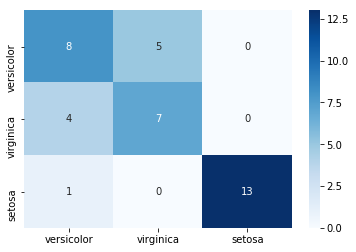

In [9]:
sns.heatmap(cm1, annot=True, xticklabels=species, yticklabels=species, cmap="Blues")

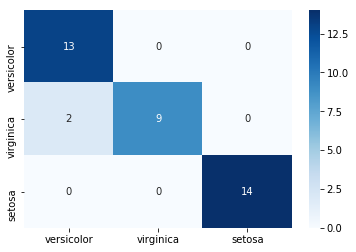

In [10]:
sns.heatmap(cm2, annot=True, xticklabels=species, yticklabels=species, cmap="Blues")

#### You may also want to take a look at receiver operating characteristic curves.

* [Sklearn Docucumentation](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
* [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

# Additional Learing Resources

* ### [Sklearn Model Selection and Scoring](http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)
* ### [Sklearn Model Evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
* ### [Sklearn Cross-Validation](http://scikit-learn.org/stable/modules/cross_validation.html)
* ### [Sklearn Scoring Table](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)


---

# Next Up: [Resources](6_resources.ipynb)

<br>

<img style="margin-left: 0;" src="static/gravity_well.svg" width="20%">

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Gravity_well_plot.svg'>BenRG</a>; released into the public domain.
</div>

---